# Stack Overflow Developers Survey 2017 Data

## Business Understanding

Every year, Stack Overflow conducts a massive survey of people on the site, covering all sorts of information like programming languages, salary, code style and various other information. This year, they amassed more than 64,000 responses fielded from 213 countries.

### Hypothesis Proposed:
1. What are the most important factors that contribute to job satisfaction among developers?
2. What skills are most in demand among developers?
3. How do developers prefer to learn new skills, and what types of training programs are most effective?

## Data Understanding

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:

df = pd.read_csv('./data/survey_results_public.csv')
print(df.shape)
df.head()

(51392, 154)


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Country Statistics

In [29]:
# set constants
FIG_SIZE = (10, 5)
NUM_DEVELOPER_TYPES = 10
NUM_COUNTRY = 10
FONT_SIZE = 14

The number of countries: 201


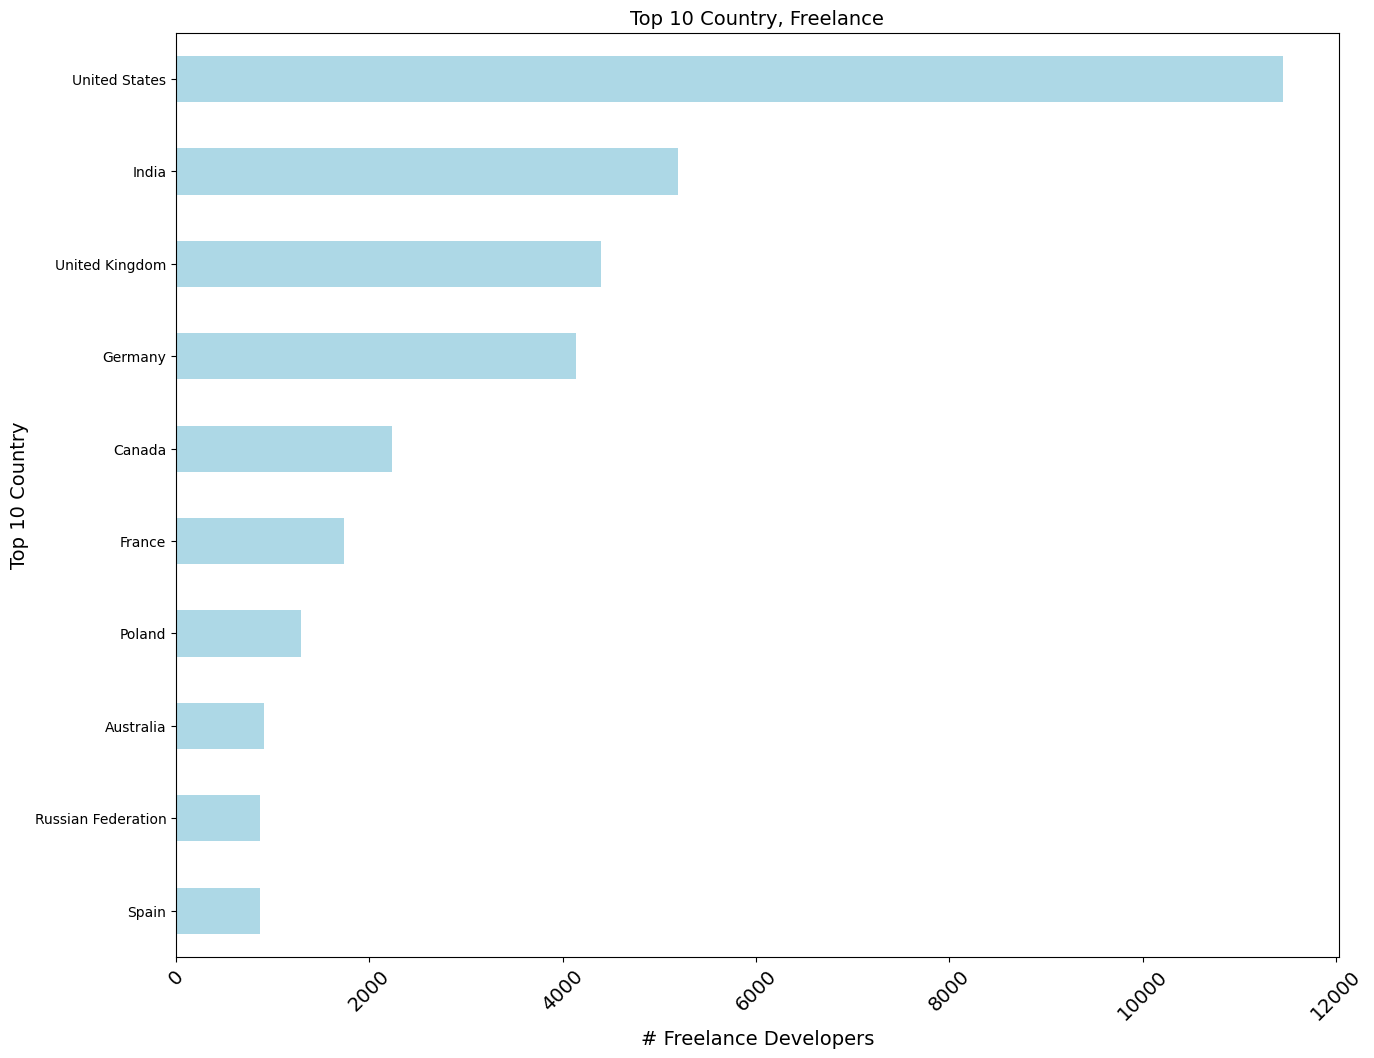

In [41]:
# get the number of developers in each country
country_counts = df['Country'].value_counts()
# display the total number of countries
print(f'The number of countries: {country_counts.shape[0]}')
# create a horizontal bar chart of the top 10 countries
fig = plt.figure(figsize=FIG_SIZE)
top_country = country_counts.head(NUM_COUNTRY).sort_values(ascending=True)
top_country.plot.barh(color='#add8e6')
plt.title(f'Top {NUM_COUNTRY} Country, Freelance', fontsize=FONT_SIZE)
plt.xticks(rotation=45, fontsize=FONT_SIZE)
plt.xlabel('# Freelance Developers', fontsize=FONT_SIZE)
plt.ylabel(f'Top {NUM_COUNTRY} Country', fontsize=FONT_SIZE)
plt.show()


## Developer Type Statistics

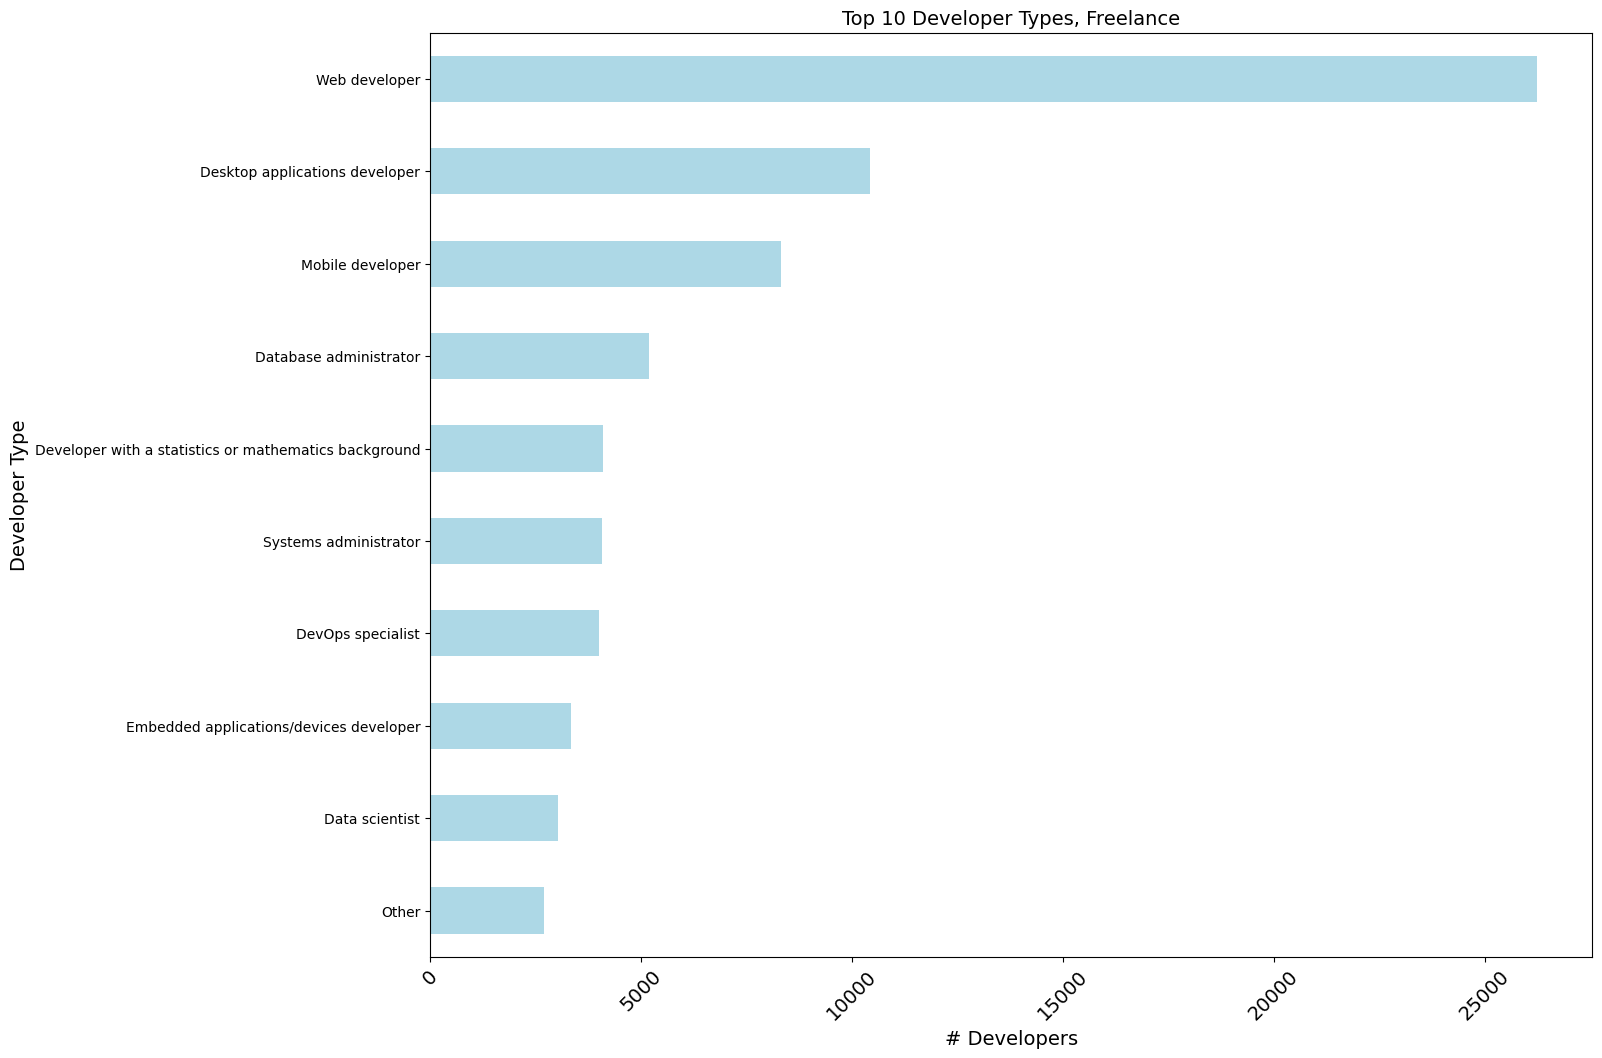

In [42]:

# extract developer types and count occurrences
developer_types = df['DeveloperType'].str.split(';').explode().str.strip().dropna()
top_developer_types = developer_types.value_counts().head(NUM_DEVELOPER_TYPES).sort_values(ascending=True)

# create horizontal bar chart of top developer types
plt.figure(figsize=FIG_SIZE)
top_developer_types.plot.barh(color='#add8e6')
plt.title(f'Top {NUM_DEVELOPER_TYPES} Developer Types, Freelance', fontsize=FONT_SIZE)
plt.xticks(rotation=45, fontsize=FONT_SIZE)
plt.xlabel('# Developers', fontsize=FONT_SIZE)
plt.ylabel('Developer Type', fontsize=FONT_SIZE)
plt.show()

# Data Preparation and Evaluation

##  1. What are the most important factors that contribute to job satisfaction among developers?

- Salary: Compensation is a key factor in job satisfaction for many people, including developers. Higher salaries can make developers feel more valued and provide greater financial security.

- Job Satisfaction: The question itself is a factor that we can consider, as it directly asks developers about their satisfaction with their job. If developers are happy with their work, they are more likely to be satisfied with their job overall.

- Hours Per Week: Work-life balance is important for job satisfaction, and the number of hours worked per week can impact that balance. Developers who work long hours or feel overworked may be less satisfied with their job.

- Job Security: Feeling secure in one's job is important for job satisfaction. Developers who are concerned about layoffs or job instability may be less satisfied with their job.

- Career Satisfaction: This factor is related to job satisfaction but focuses specifically on satisfaction with one's career trajectory. Developers who feel that they are progressing in their careers and are on a path towards their goals may be more satisfied with their job.

- Learning New Tech: Developers enjoy learning new technologies and staying up-to-date with the latest trends. Companies that provide opportunities for learning and growth may increase job satisfaction among developers.

It's important to note that these are just a few of the many factors that can contribute to job satisfaction among developers. The relative importance of each factor may vary depending on the individual, their job, and their workplace culture.

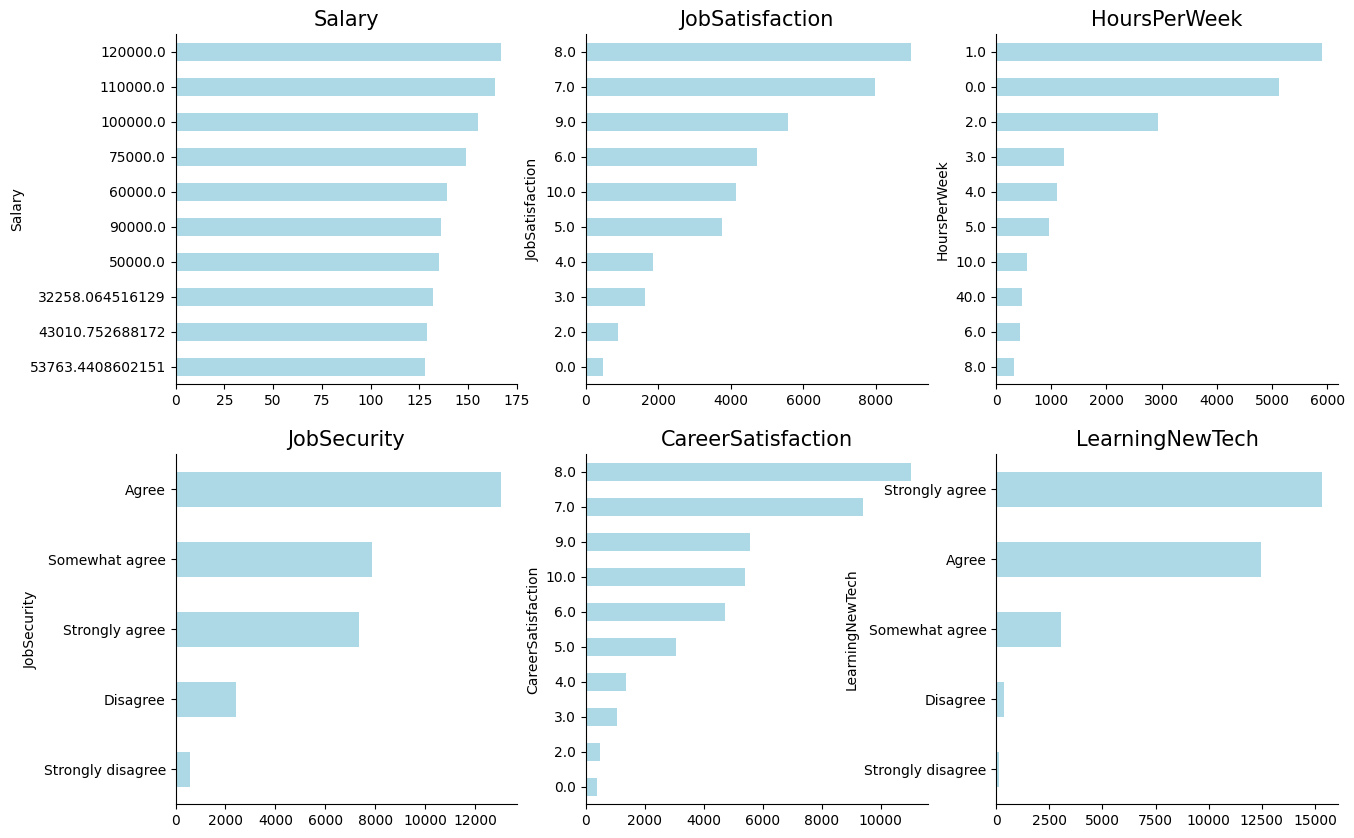

In [60]:
# Select the columns of interest
cols = ['Salary','JobSatisfaction','HoursPerWeek','JobSecurity', 'CareerSatisfaction','LearningNewTech']

fig, ax = plt.subplots(2, 3, figsize=(15, 10))

a = 0
b = 0

for col in cols:
    
    # Select a subset of the data for the current column
    series = df[col].dropna()
    sub_df = series.value_counts().head(10).sort_values()
    
    # Create the subplot and plot the data
    sub_df.plot.barh(color='#add8e6', ax=ax[a, b])
    
    # Customize the subplot
    ax[a, b].spines['right'].set_visible(False)
    ax[a, b].spines['top'].set_visible(False)
    ax[a, b].set_title(str(col), fontsize=15)
    
    # Update the position of the subplot
    b += 1
    if b == 3:
        b = 0
        a += 1
        
plt.show()


## 2. What skills are most in demand among developers?
The Stack Overflow dataset includes information on the programming languages, frameworks, databases, and platforms that developers have worked with in the past and are interested in working with in the future. By analyzing this data, we can determine which skills are most in demand among developers.

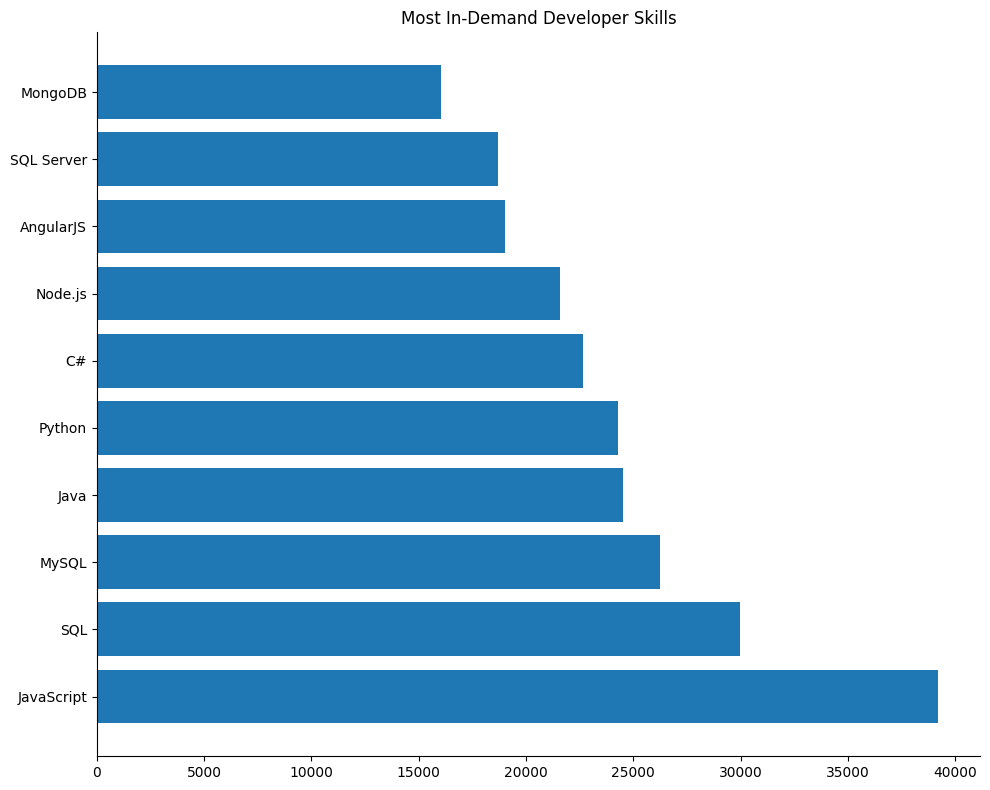

In [69]:
# Extract the relevant columns
cols = ['HaveWorkedLanguage', 'WantWorkLanguage', 'HaveWorkedFramework', 'WantWorkFramework',
        'HaveWorkedDatabase', 'WantWorkDatabase', 'WantWorkPlatform']
df_free = df[cols]

# Split the skills in each column and count their frequency
skills = set()
skill_counts = {}
for col in cols:
    series = df_free[col].str.split(';').explode().str.strip().dropna()
    for skill in series:
        skills.add(skill)
        if skill in skill_counts:
            skill_counts[skill] += 1
        else:
            skill_counts[skill] = 1

# Sort the skills by their total frequency over all years
skill_totals = {skill: skill_counts[skill] for skill in skills}
skill_order = sorted(skill_totals.keys(), key=lambda x: skill_totals[x], reverse=True)

# Plot the top 10 skills
fig, ax = plt.subplots(figsize=(10, 8))
skill_freqs = [skill_counts[skill] for skill in skill_order[:10]]
ax.barh(skill_order[:10], skill_freqs)
ax.set_title("Most In-Demand Developer Skills")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.show()


## 3. How do developers prefer to learn new skills, and what types of training programs are most effective?
- TimeAfterBootcamp: This column indicates the amount of time that has passed since a developer completed a coding bootcamp. This information can be used to understand the effectiveness of bootcamps in training developers and their subsequent progress.

- EducationTypes: This column includes information on the type of education a developer has received. This can include traditional university degrees, online courses, coding bootcamps, and other forms of education. Understanding the type of education that developers find most effective can help training programs improve their offerings.

- HighestEducationParents: This column provides information on the educational background of a developer's parents. This information can be useful in understanding the influence of parental education on the success of developers, and can help identify factors that may impact the effectiveness of training programs.

- SelfTaughtTypes: This column indicates the types of skills that developers have taught themselves. This information can be used to understand the effectiveness of self-directed learning and identify the most popular and effective resources for developers looking to expand their skillset.

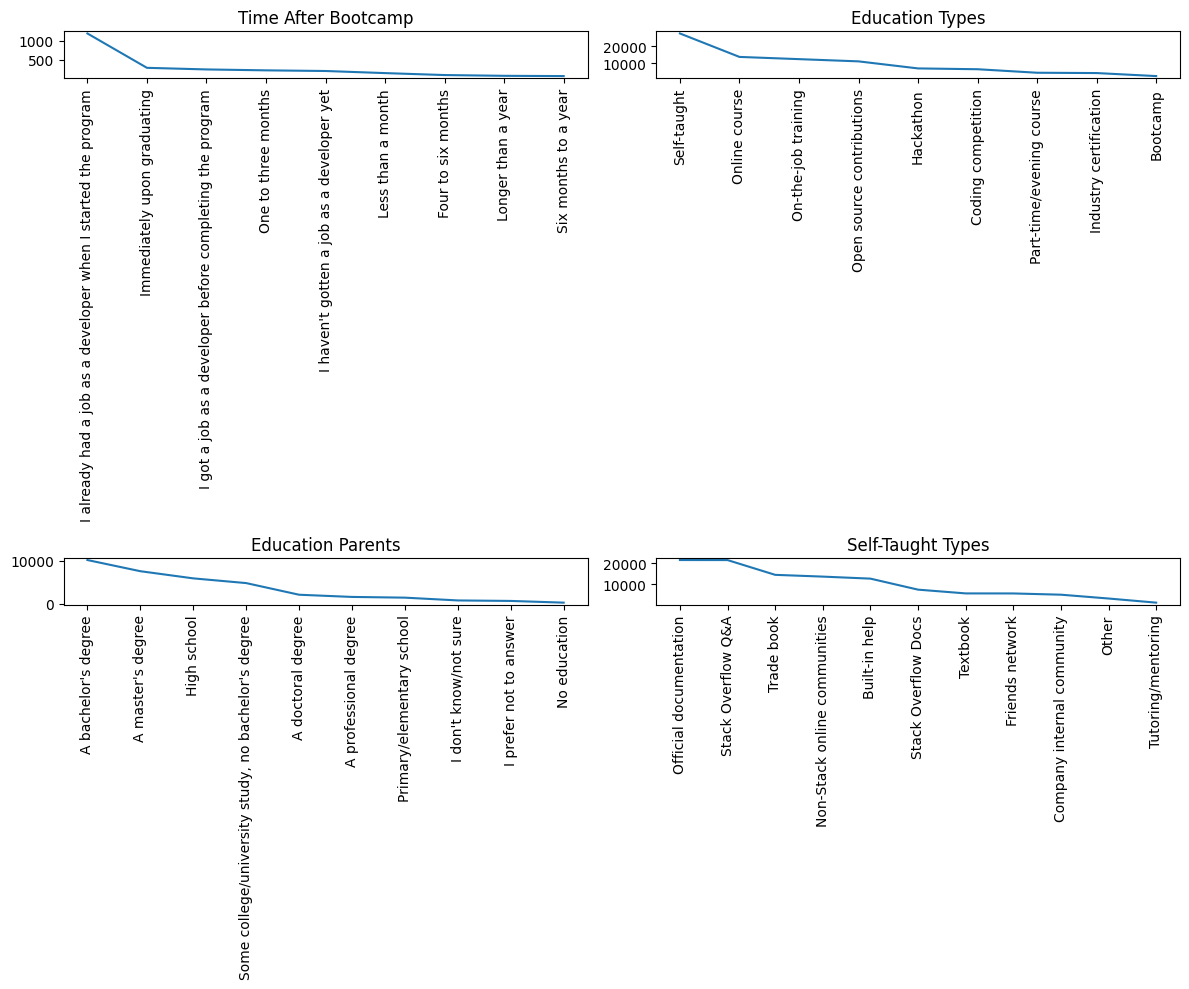

In [80]:
# Extract the relevant columns
cols = ['TimeAfterBootcamp', 'EducationTypes', 'HighestEducationParents', 'SelfTaughtTypes']
df_subset = df[cols]

# Define a function to count the frequency of each response in a column
def count_responses(col):
    counts = {}
    for row in col:
        if pd.isnull(row):
            continue
        for response in row.split(';'):
            response = response.strip()
            if response in counts:
                counts[response] += 1
            else:
                counts[response] = 1
    return counts

# Count the frequency of each response in each column
counts_bootcamp = count_responses(df_subset['TimeAfterBootcamp'])
counts_education = count_responses(df_subset['EducationTypes'])
counts_parents = count_responses(df_subset['HighestEducationParents'])
counts_selftaught = count_responses(df_subset['SelfTaughtTypes'])

# Sort the responses by their frequency in each column
order_bootcamp = sorted(counts_bootcamp, key=counts_bootcamp.get, reverse=True)
order_education = sorted(counts_education, key=counts_education.get, reverse=True)
order_parents = sorted(counts_parents, key=counts_parents.get, reverse=True)
order_selftaught = sorted(counts_selftaught, key=counts_selftaught.get, reverse=True)

# Plot line graphs for each column
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axs = axs.flatten()

# TimeAfterBootcamp
axs[0].plot(order_bootcamp, [counts_bootcamp[k] for k in order_bootcamp])
axs[0].tick_params(axis='x', labelrotation=90)
axs[0].set_xticks(range(len(order_bootcamp)))
axs[0].set_title('Time After Bootcamp')

# EducationTypes
axs[1].plot(order_education, [counts_education[k] for k in order_education])
axs[1].tick_params(axis='x', labelrotation=90)
axs[1].set_xticks(range(len(order_education)))
axs[1].set_title('Education Types')

# EducationParents
axs[2].plot(order_parents, [counts_parents[k] for k in order_parents])
axs[2].tick_params(axis='x', labelrotation=90)
axs[2].set_xticks(range(len(order_parents)))
axs[2].set_title('Education Parents')

# SelfTaughtTypes
axs[3].plot(order_selftaught, [counts_selftaught[k] for k in order_selftaught])
axs[3].tick_params(axis='x', labelrotation=90)
axs[3].set_xticks(range(len(order_selftaught)))
axs[3].set_title('Self-Taught Types')

plt.tight_layout()
plt.show()
